In [19]:
import pandas as pd
import os
import numpy as np
import scipy as ss
import scipy.stats
import matplotlib.pyplot as plt
import itertools
%matplotlib inline
from operator import itemgetter
import seaborn as sns
data = "/Users/annasintsova/git_repos/HUTI-RNAseq/data/get_homologs_output/C50_S90_e0_/run_C50_S90_e0__pan_C50_S90/2018-02-26_pangenome_matrix_t0_crossRef.csv"
data = pd.read_csv(data, index_col=0)
pan_mat = data.iloc[:,0:16]
count_mat = data.iloc[:,16:]
count_mat.head()
count_mat.dropna(inplace=True)
to_drop = [c for c in count_mat.columns if 'counts' in c or 'seq' in c]
count_mat = count_mat.drop(to_drop, axis =1)
count_mat.head()

,HM01_UR_RPKM,HM01_UTI_RPKM,HM03_UR_RPKM,HM03_UTI_RPKM,HM06_UR_RPKM,HM06_UTI_RPKM,HM07_UR_RPKM,HM07_UTI_RPKM,HM14_UR_RPKM,HM14_UTI_RPKM,...,HM57_UR_RPKM,HM57_UTI_RPKM,HM60_UR_RPKM,HM60_UTI_RPKM,HM68_UR_RPKM,HM68_UTI_RPKM,HM66_UR_RPKM,HM66_UTI_RPKM,HM86_UR_RPKM,HM86_UTI_RPKM
359_mbhA.faa,2.57,0.12,3.45,0.59,3.90,0.07,5.13,0.02,1.36,0.10,...,1.47,0.10,2.66,0.01,6.22,0.08,0.64,0.00,1.57,0.59
363_prfH.faa,2.64,0.09,7.93,1.08,7.88,0.45,9.40,0.05,10.55,2.86,...,2.45,0.03,1.64,0.06,6.27,0.10,3.51,0.00,1.63,1.22
368_crl.faa,821.47,26.43,834.85,96.92,733.30,7.44,1181.11,6.66,1282.52,286.21,...,609.68,0.71,583.83,0.79,1160.49,7.32,468.45,0.67,462.24,137.69
398_2-5-diketo-D-gluconi...faa,72.95,1.31,49.95,4.66,102.07,1.96,32.94,0.41,24.67,6.06,...,112.07,0.12,85.34,0.32,104.53,1.35,123.22,0.22,58.46,12.30
689_ybeM.faa,61.37,1.37,69.65,1.99,26.84,0.48,123.62,0.25,53.11,7.60,...,39.68,0.04,31.85,0.05,39.80,0.19,25.11,0.05,37.51,6.90


In [44]:
df = count_mat.join(data['MG1655'])
df.set_index('MG1655', inplace=True)
df.sort_index(inplace=True)
col_names = sorted([tuple(c.split("_")) for c in df.columns], key=itemgetter(1,0))
col_names = ["_".join(c) for c in col_names]
df = df[col_names]
df.head()
good = df[["HM14_UR_RPKM", 
           "HM43_UR_RPKM",
           "HM54_UR_RPKM",
           "HM56_UR_RPKM",
           "HM86_UR_RPKM",
           "HM14_UTI_RPKM", 
            "HM43_UTI_RPKM",
         "HM54_UTI_RPKM",          
         "HM56_UTI_RPKM",
           "HM86_UTI_RPKM"]]

good.columns = [i.split("_RPKM")[0] for i in good.columns]
good.head()

,HM14_UR,HM43_UR,HM54_UR,HM56_UR,HM86_UR,HM14_UTI,HM43_UTI,HM54_UTI,HM56_UTI,HM86_UTI
MG1655,,,,,,,,,,
b0002,99.75,86.00,75.61,100.18,92.22,64.27,13.81,11.62,27.64,44.36
b0003,87.69,92.42,102.67,226.19,187.38,40.24,8.34,13.47,53.29,100.88
b0004,53.80,82.66,67.78,94.77,105.31,25.70,7.98,7.39,18.97,58.90
b0006,176.25,254.72,160.21,172.15,131.10,140.63,83.17,88.91,107.27,85.65
b0007,16.17,26.59,21.16,24.14,16.81,3.07,0.76,4.00,3.03,3.15


//anaconda/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


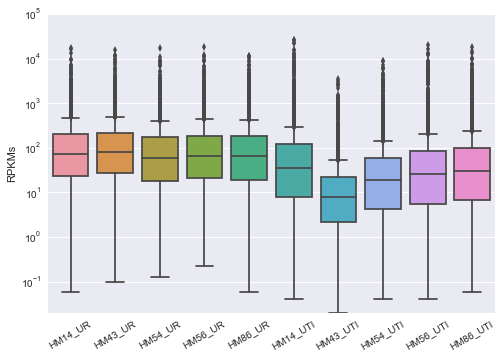

In [186]:
ax = sns.boxplot(good[good >0])
ax.set_yscale('log')
ax.set_ylim((0, 100000))
labels = ax.get_xticklabels()
ax.set_xticklabels(labels, rotation=30);
ax.set_ylabel("RPKMs")

In [119]:
goodT = good.T
sums = {i:good[i].sum() for i in good.columns}
#goodT.head()
#good[good.HM14_UR > 10].shape
sums
greater1 = [good[good[i] > 1].shape[0]/2725*100 for i in good.columns]

greater100 = [good[good[i] > 100].shape[0]/2725*100 for i in good.columns]
greater1000 = [good[good[i] > 1000].shape[0]/2725*100 for i in good.columns]

In [121]:
sensetivity = [greater1, greater100, greater1000]

In [122]:
sensetivity

[[98.86238532110092,
  99.0091743119266,
  98.34862385321101,
  98.53211009174312,
  98.31192660550458,
  91.96330275229357,
  83.4862385321101,
  88.88073394495413,
  92.07339449541284,
  92.3302752293578],
 [41.39449541284404,
  43.3394495412844,
  36.99082568807339,
  38.60550458715596,
  39.19266055045871,
  29.100917431192663,
  6.6422018348623855,
  15.669724770642201,
  21.908256880733944,
  24.513761467889907],
 [4.587155963302752,
  5.431192660550459,
  4.8807339449541285,
  5.247706422018348,
  4.73394495412844,
  4.440366972477064,
  0.8073394495412843,
  2.1284403669724767,
  2.9724770642201834,
  2.8990825688073394]]

In [123]:
df2 = pd.DataFrame(sensetivity)
df2.index = ['g1', 'g100', 'g1000']
df2.columns = good.columns
df2.head()

,HM14_UR,HM43_UR,HM54_UR,HM56_UR,HM86_UR,HM14_UTI,HM43_UTI,HM54_UTI,HM56_UTI,HM86_UTI
g1,98.862385,99.009174,98.348624,98.532110,98.311927,91.963303,83.486239,88.880734,92.073394,92.330275
g100,41.394495,43.339450,36.990826,38.605505,39.192661,29.100917,6.642202,15.669725,21.908257,24.513761
g1000,4.587156,5.431193,4.880734,5.247706,4.733945,4.440367,0.807339,2.128440,2.972477,2.899083


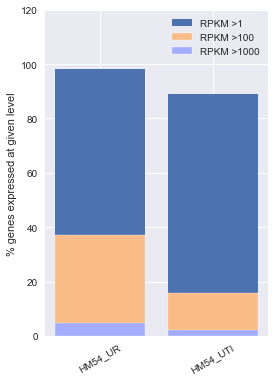

In [142]:
df3 = df2[["HM54_UR", "HM54_UTI"]].T
r = [0,1]#,2,3,4,5,6,7,8,9]
plt.figure(figsize=(4,6))
plt.bar(r, df3.g1, label = "RPKM >1")
plt.bar(r, df3.g100,  color='#f9bc86', edgecolor='white', label = "RPKM >100")
plt.bar(r, df3.g1000,  color='#a3acff', edgecolor='white', label = "RPKM >1000")
plt.xticks(r, df3.index, rotation = 30);
plt.ylim(0, 120)
plt.ylabel("% genes expressed at given level")
plt.legend()
#ax 

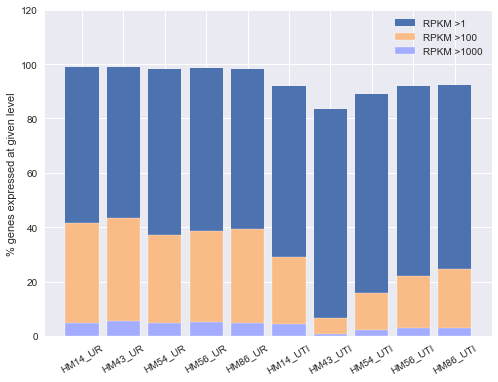

In [143]:
df3 = df2.T
r = [0,1,2,3,4,5,6,7,8,9]
plt.figure(figsize=(8,6))
plt.bar(r, df3.g1, label = "RPKM >1")
plt.bar(r, df3.g100,  color='#f9bc86', edgecolor='white', label = "RPKM >100")
plt.bar(r, df3.g1000,  color='#a3acff', edgecolor='white', label = "RPKM >1000")
plt.xticks(r, df3.index, rotation = 30);
plt.ylim(0, 120)
plt.ylabel("% genes expressed at given level")
plt.legend()
#ax 

In [154]:
ribosomal_subs = ["b0023", "b0169", "b0911", "b1089",
                 "b1716", "b1717", "b2185", "b2606", 
                 "b2607", "b2608", "b2609", "b3065",
                 "b3165", "b3185", "b3186", "b3230",
                 "b3231", "b3294", "b3295", "b3296",
                 "b3297", "b3298", "b3299", "b3300",
                 "b3301", "b3302", "b3303","b3304",
                 "b3305", "b3306", "b3307", "b3308", 
                 "b3309", "b3310", "b3311", "b3312", 
                 "b3313", "b3314", "b3315", "b3316",
                 "b3317", "b3318", "b3320", "b3321", 
                 "b3342", "b3341", "b3636", "b3637",
                 "b3703", "b3936", "b3983", "b3984",
                 "b3985", "b3986"]


In [160]:
rib = good.loc[ribosomal_subs]

In [162]:
rib.dropna()

,HM14_UR,HM43_UR,HM54_UR,HM56_UR,HM86_UR,HM14_UTI,HM43_UTI,HM54_UTI,HM56_UTI,HM86_UTI
MG1655,,,,,,,,,,
b0023,1320.12,1352.02,1055.05,790.49,1264.50,3380.49,531.67,1250.89,3824.17,3227.91
b0169,2632.15,4026.76,2586.23,3186.96,3544.50,11362.42,1301.84,4045.56,7838.89,7425.00
b0911,1127.43,1016.03,1251.98,1277.28,1310.53,5625.86,684.82,1850.05,3614.64,3850.04
b1089,256.23,460.77,355.98,370.40,414.87,557.92,102.21,323.68,640.85,577.09
b1716,1246.07,1697.53,1206.77,1390.84,1523.10,2015.91,302.40,540.55,1152.17,1235.26
b2185,1011.67,935.66,613.88,620.33,798.48,5263.11,334.38,836.03,1628.86,1999.31
b3065,373.11,336.14,283.86,223.86,371.61,796.65,183.95,368.46,778.34,1031.61
b3165,1095.71,1723.25,1184.60,1305.80,1897.39,3399.28,558.07,1523.06,2630.30,3020.70
b3185,643.97,445.95,595.38,551.16,753.88,1626.73,165.90,437.72,1411.02,1353.99


In [167]:
rib_sums = {i:rib[i].sum(axis=0) for i in rib.columns}

In [165]:
rib_sums

{'HM14_UR': 51975.80999999999,
 'HM14_UTI': 305025.64,
 'HM43_UR': 95388.55,
 'HM43_UTI': 41506.78,
 'HM54_UR': 68982.7,
 'HM54_UTI': 106436.20000000003,
 'HM56_UR': 90146.46000000004,
 'HM56_UTI': 227615.64,
 'HM86_UR': 96651.36999999998,
 'HM86_UTI': 188080.59000000003}

In [172]:
per = {i:rib_sums[i]/sums[i]*100 for i in rib.columns}

In [173]:
per

{'HM14_UR': 7.582345616002016,
 'HM14_UTI': 40.5362303767646,
 'HM43_UR': 12.970616056517908,
 'HM43_UTI': 35.9731242321751,
 'HM54_UR': 11.278126096776488,
 'HM54_UTI': 35.078298189626196,
 'HM56_UR': 12.636328596301968,
 'HM56_UTI': 43.24884674024817,
 'HM86_UR': 14.810644419396866,
 'HM86_UTI': 37.18082424378243}

In [177]:
per_df = pd.DataFrame.from_dict(per, orient ='index')
per_df.columns = ['Ribosomal Expression']

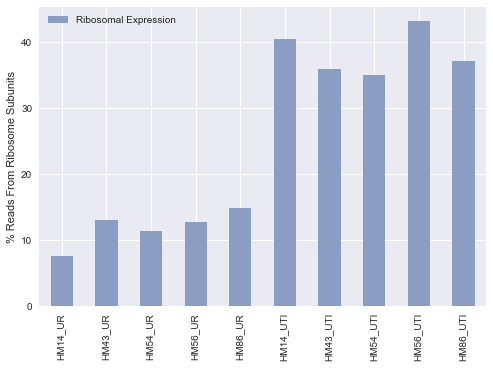

In [185]:
ax = per_df.plot.bar(color = '#8b9dc3')
ax.set_ylabel("% Reads From Ribosome Subunits")

TypeError: bar() missing 1 required positional argument: 'height'